# **Introduction**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.
So we will try to understand the data more and try to filter it and build a model capable of distinguishing between diabetics.

## Init or import the important libraries we need

In [1]:
'''
NumPy is Python libraries. It is used in the industry for array computing. 
'''
import numpy as np 
'''
Pandas stands for “Python Data Analysis Library"  is use to analyzing data with Python and it 
is one of the most preferred and widely used tools in data munging/wrangling 
'''
import pandas as pd
'''
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB
'''
import matplotlib.pyplot as plt
'''
Seaborn is a Python data visualization library based on matplotlib. 
It provides a high-level interface for drawing attractive and informative statistical graphics.
'''
import seaborn as sns
'''
Scikit-Learn (sklearn) is Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib.
'''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
'''
Keras is an API designed for human beings, not machines.
Keras follows best practices for reducing cognitive load
'''
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
'''
Mlxtend (machine learning extensions) is a Python library of useful tools
for the day-to-day data science tasks.
'''
from mlxtend.plotting import plot_decision_regions
'''
After running this command (it needs to be done only once per kernel/session), 
any cell within the notebook that creates a plot will
embed a PNG image of the resulting graphic:
'''
%matplotlib inline

'''
missingno (shorthand msno) is a glitch Pokemon.
It's also the name of a Python library for the exploratory visualization of missing data.
'''
import missingno as msno


## Read the dataset

In [2]:
df = pd.read_csv('Dataset.csv' , sep=';') # split the data in ';'
df.head() # show the first 5 rows '5 is the defulat value for the function'

,A,B,C,D,E,F,G,H,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       768 non-null    int64  
 1   B       768 non-null    int64  
 2   C       768 non-null    int64  
 3   D       768 non-null    int64  
 4   E       768 non-null    int64  
 5   F       768 non-null    float64
 6   G       768 non-null    float64
 7   H       768 non-null    int64  
 8   Class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Because the column names do not explain what the values inside them represent, I did a search to verify the names of the columns and changed them accordingly.

In [4]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Data discovery

well, now we will display information about the data and some other information related to it

Here we will see the Unique values in our main class

In [5]:
df['Outcome'].unique()

array(['tested_positive', 'tested_negative'], dtype=object)

Here we will change the values of the main class from positive and negative to one and zero to facilitate the process of dealing with them.

In [6]:
df['Outcome'] = df['Outcome'].replace({'tested_negative': 0, 'tested_positive': 1})

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.tail()# show the last 5 rows in the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
df['Outcome'].value_counts() #show the counts of unique values.

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.info() #show information of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe().T # T= transpose() Transpose index and columns.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Visualization and cleaning**

Here we will replace the values that are zero with Nan, and then we display the information for the columns that contain Nan and see if it is logical or not, and if it is not logical we will replace it with the  mean for each column

In [12]:
df_copy = df.copy(deep = True) #including a copy of the data and the indices.
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


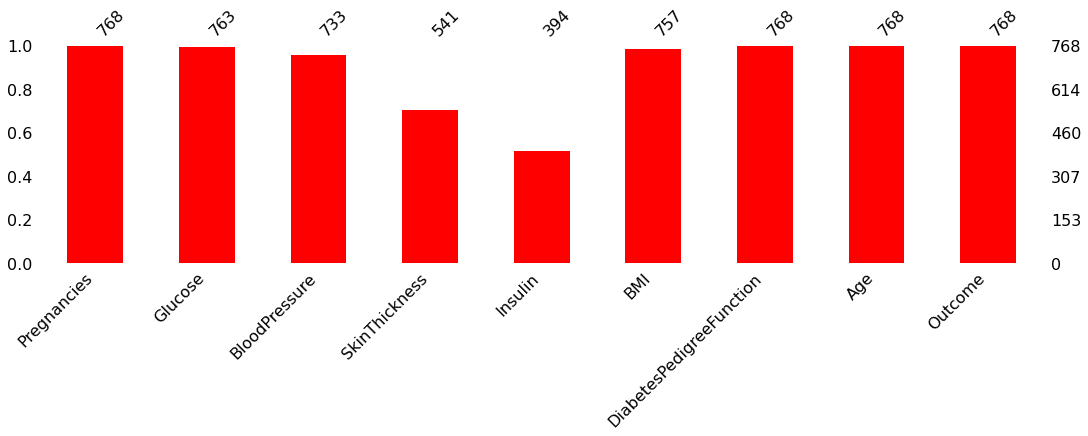

In [13]:
msno.bar(df_copy , figsize=(18,4),color = 'red')

 Here we will make an exception for the columns Pregnancies, age and outcome because the columns Pregnancies and outcome from logic that they contain values equal to zero

**Aiming to impute nan values for the columns in accordance with their distribution**


In [14]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

**we will show some comparisons between the original and the modified data**

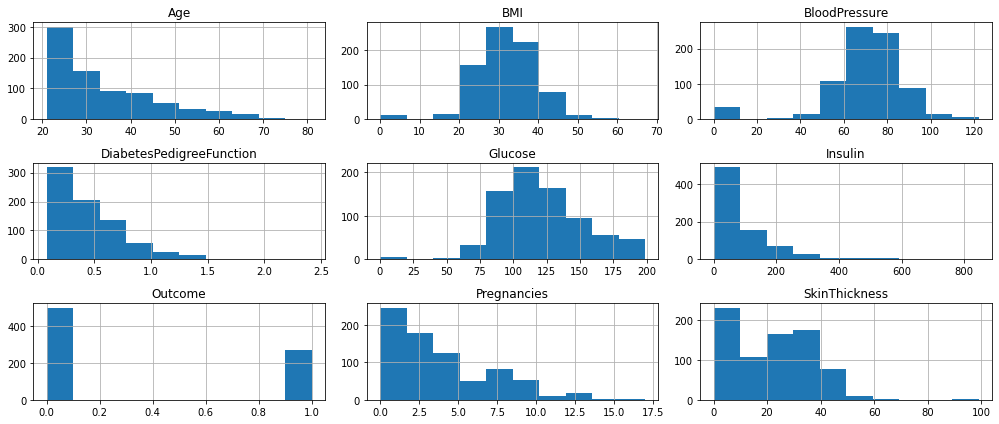

In [15]:
df.hist(figsize = (14,6))
plt.tight_layout() # used to automatically adjust subplot parameters to give specified padding

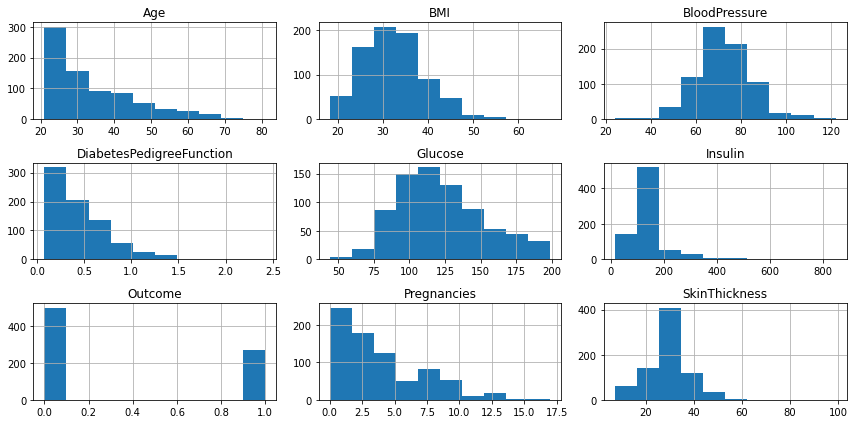

In [16]:
df_copy.hist(figsize = (12,6))
plt.tight_layout() 

In [17]:
df.shape

(768, 9)

## null count analysis

In [18]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

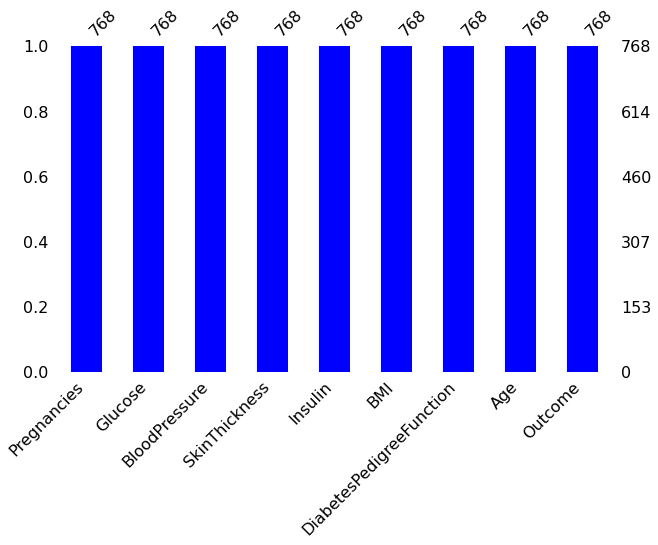

In [19]:
msno.bar(df , figsize=(10,6),color = 'blue')

**checking the balance of the data by plotting the count of outcomes by their value**


0    500
1    268
Name: Outcome, dtype: int64


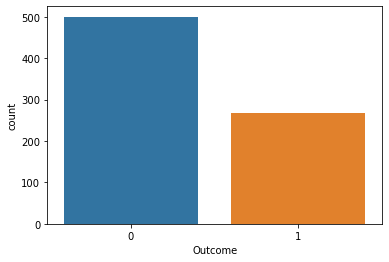

In [20]:
print(df_copy.Outcome.value_counts())
sns.countplot(df.Outcome)

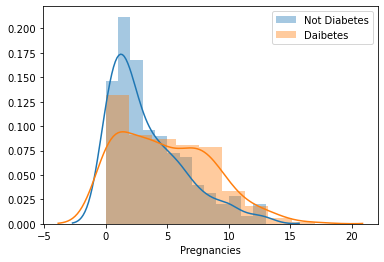

In [21]:
sns.distplot(df_copy.Pregnancies[df_copy.Outcome==0])
sns.distplot(df_copy.Pregnancies[df_copy.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

## Scatter matrix of uncleaned data

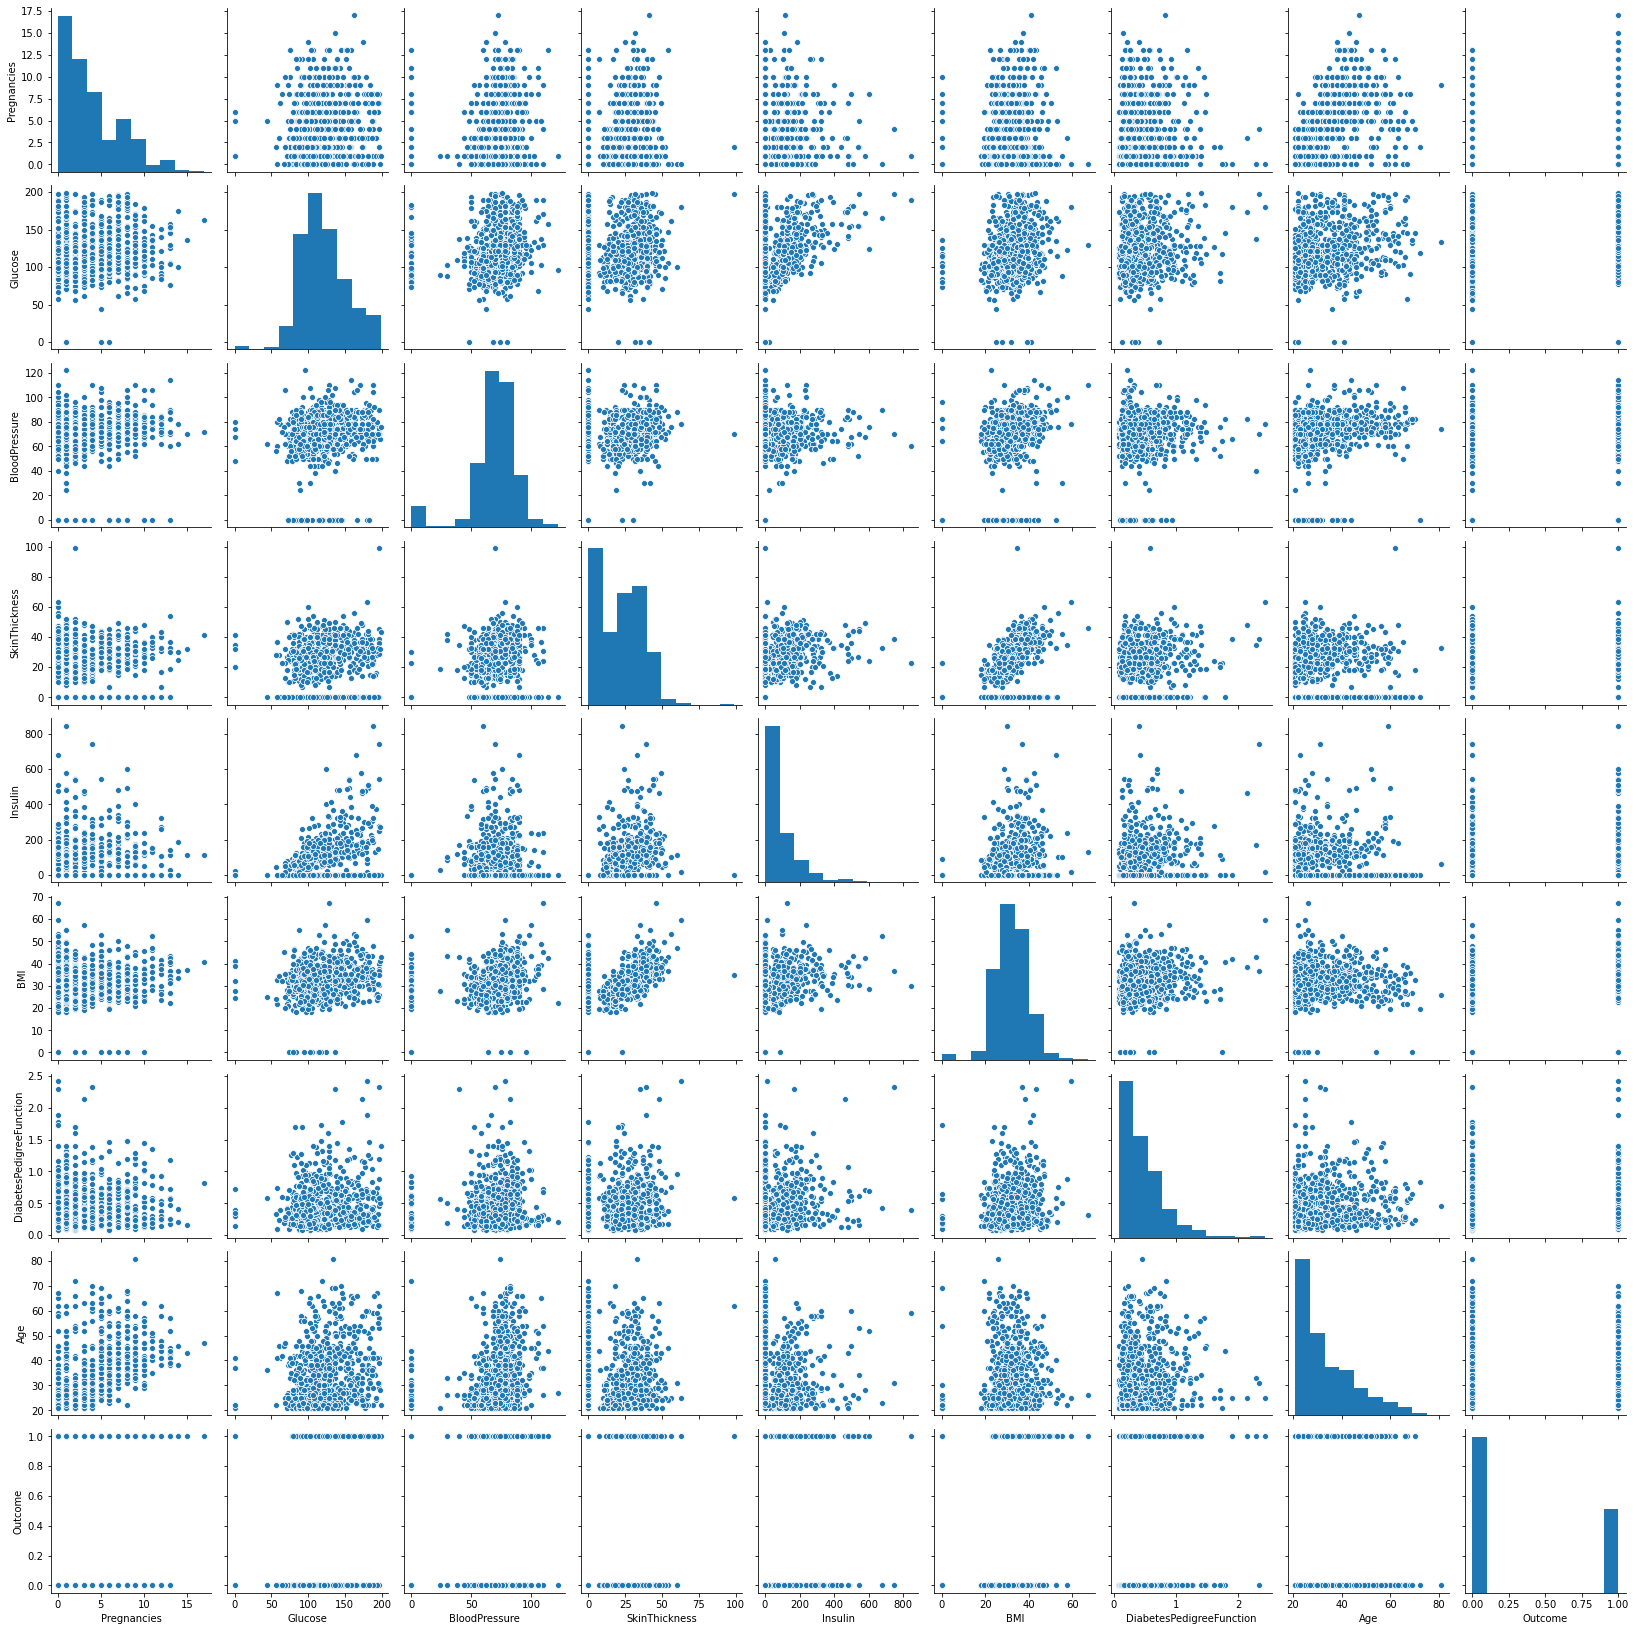

In [22]:
sns.pairplot(df)

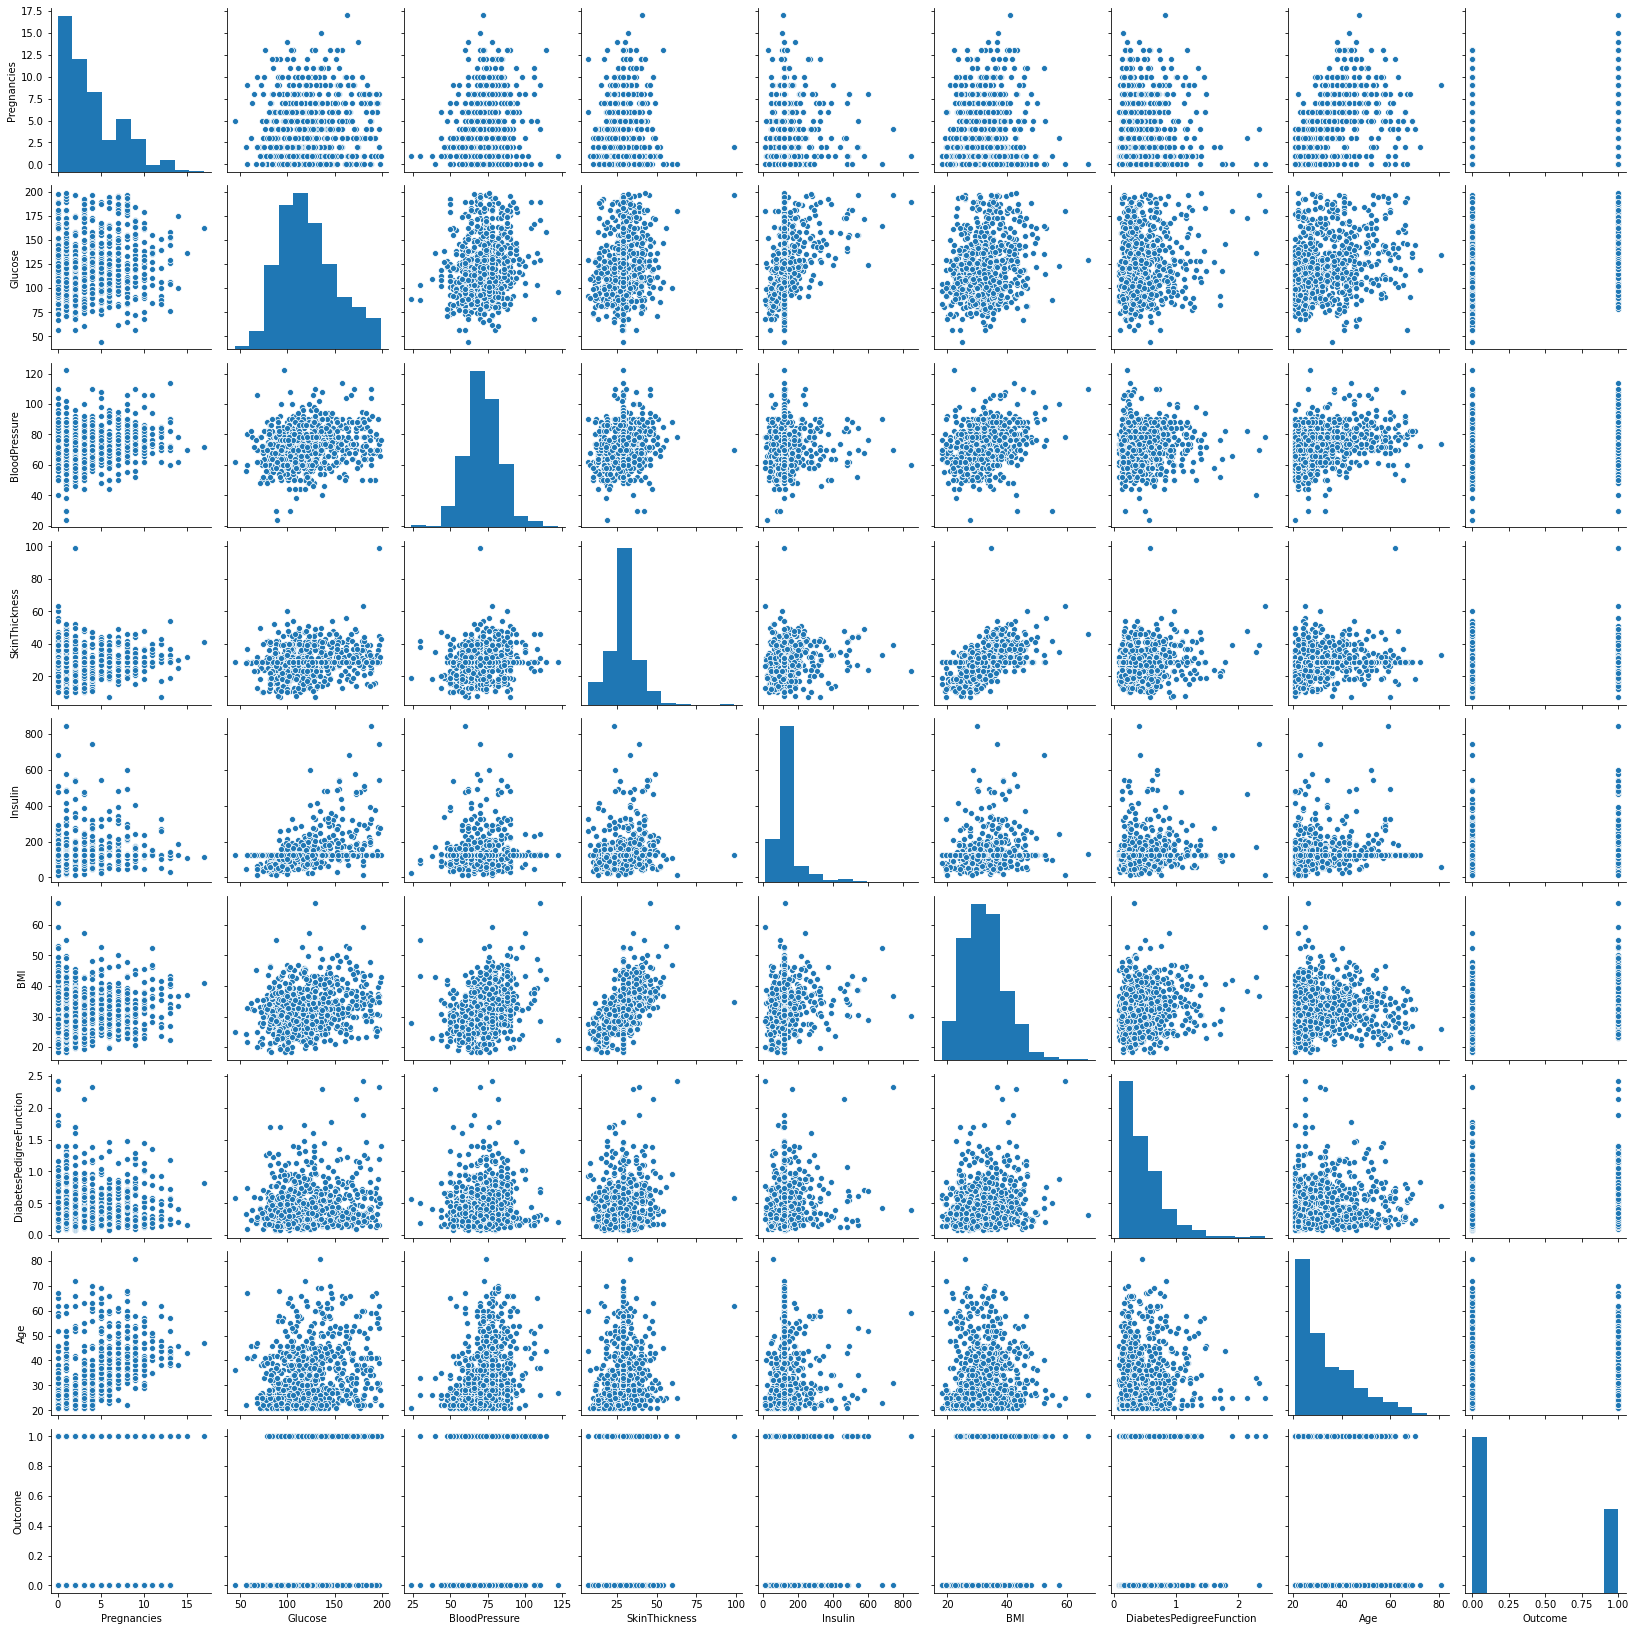

In [24]:
sns.pairplot(df_copy)

## Pair plot comparisons between the original and the modified data

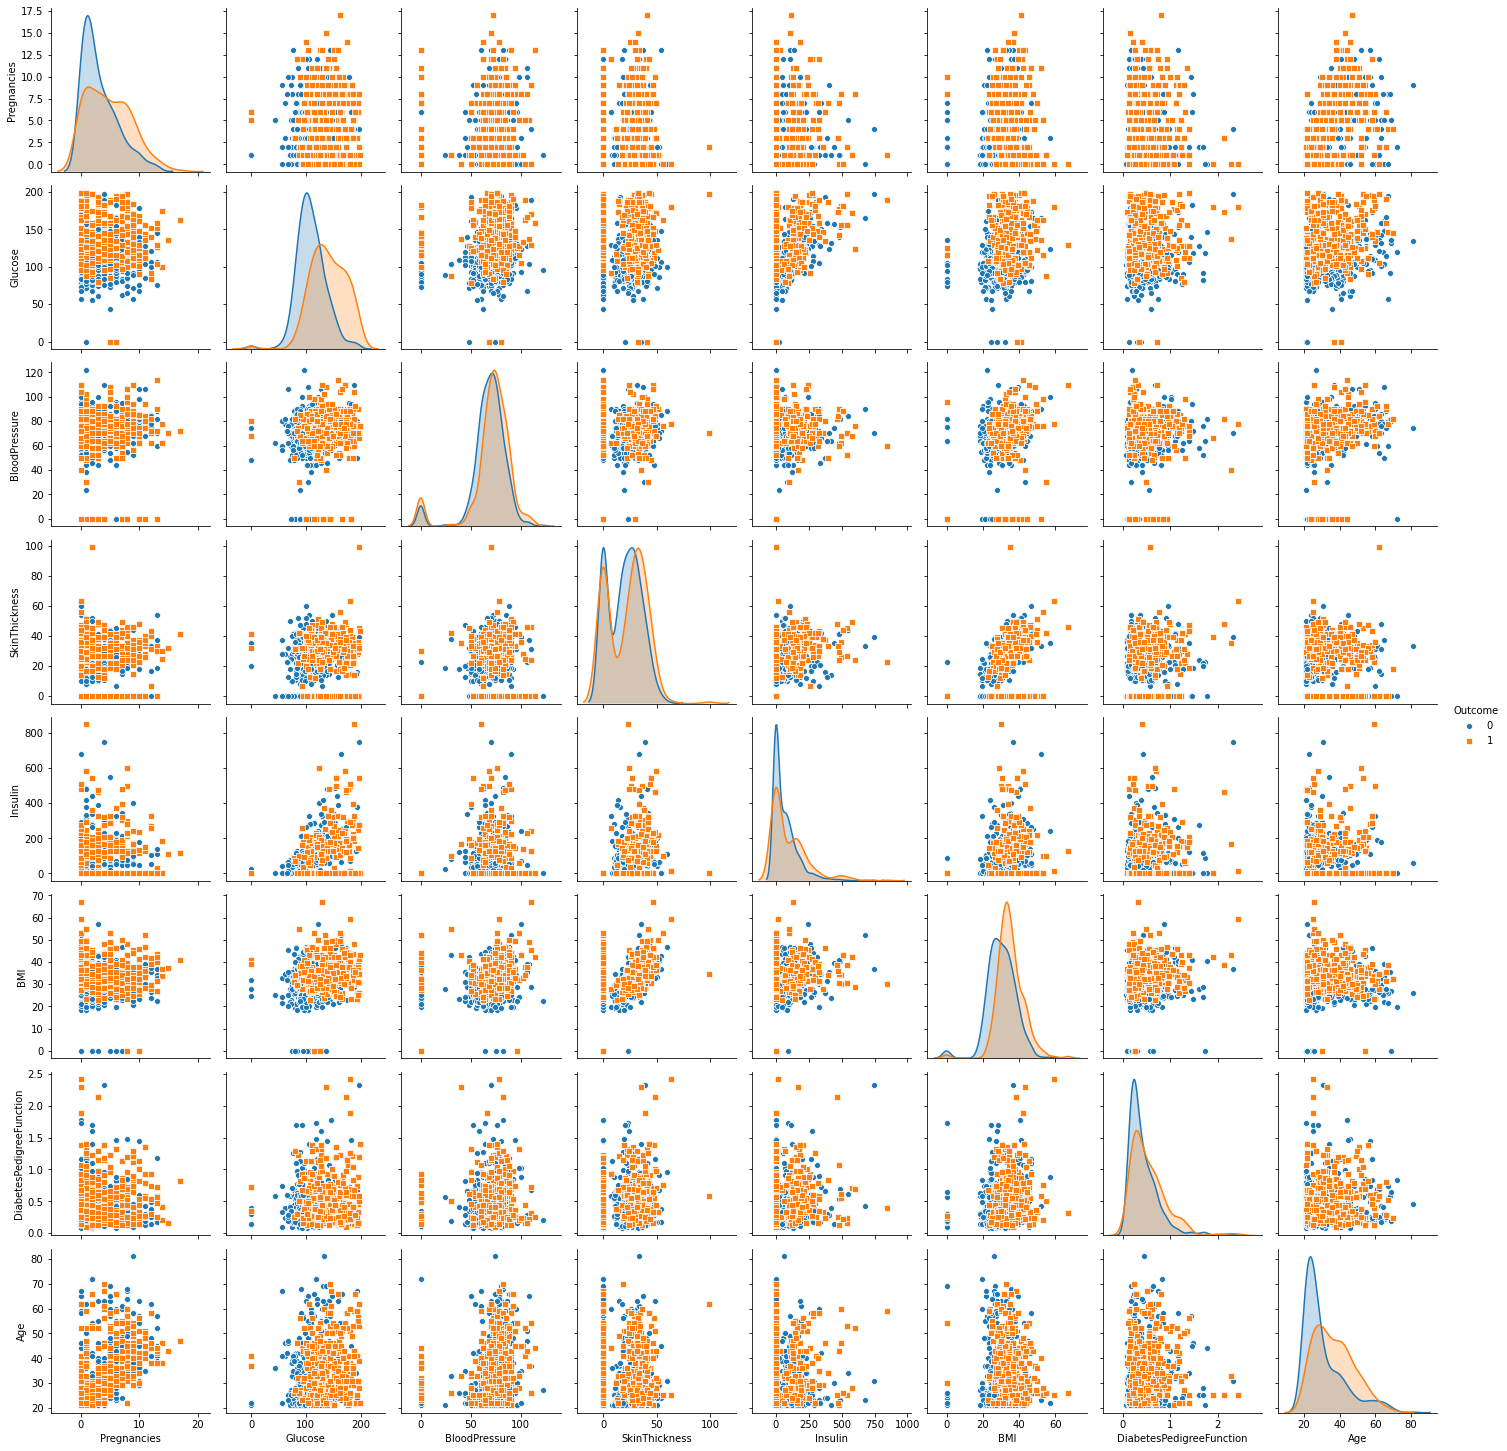

In [27]:
sns.pairplot(df , hue='Outcome' , markers=["o", "s"])

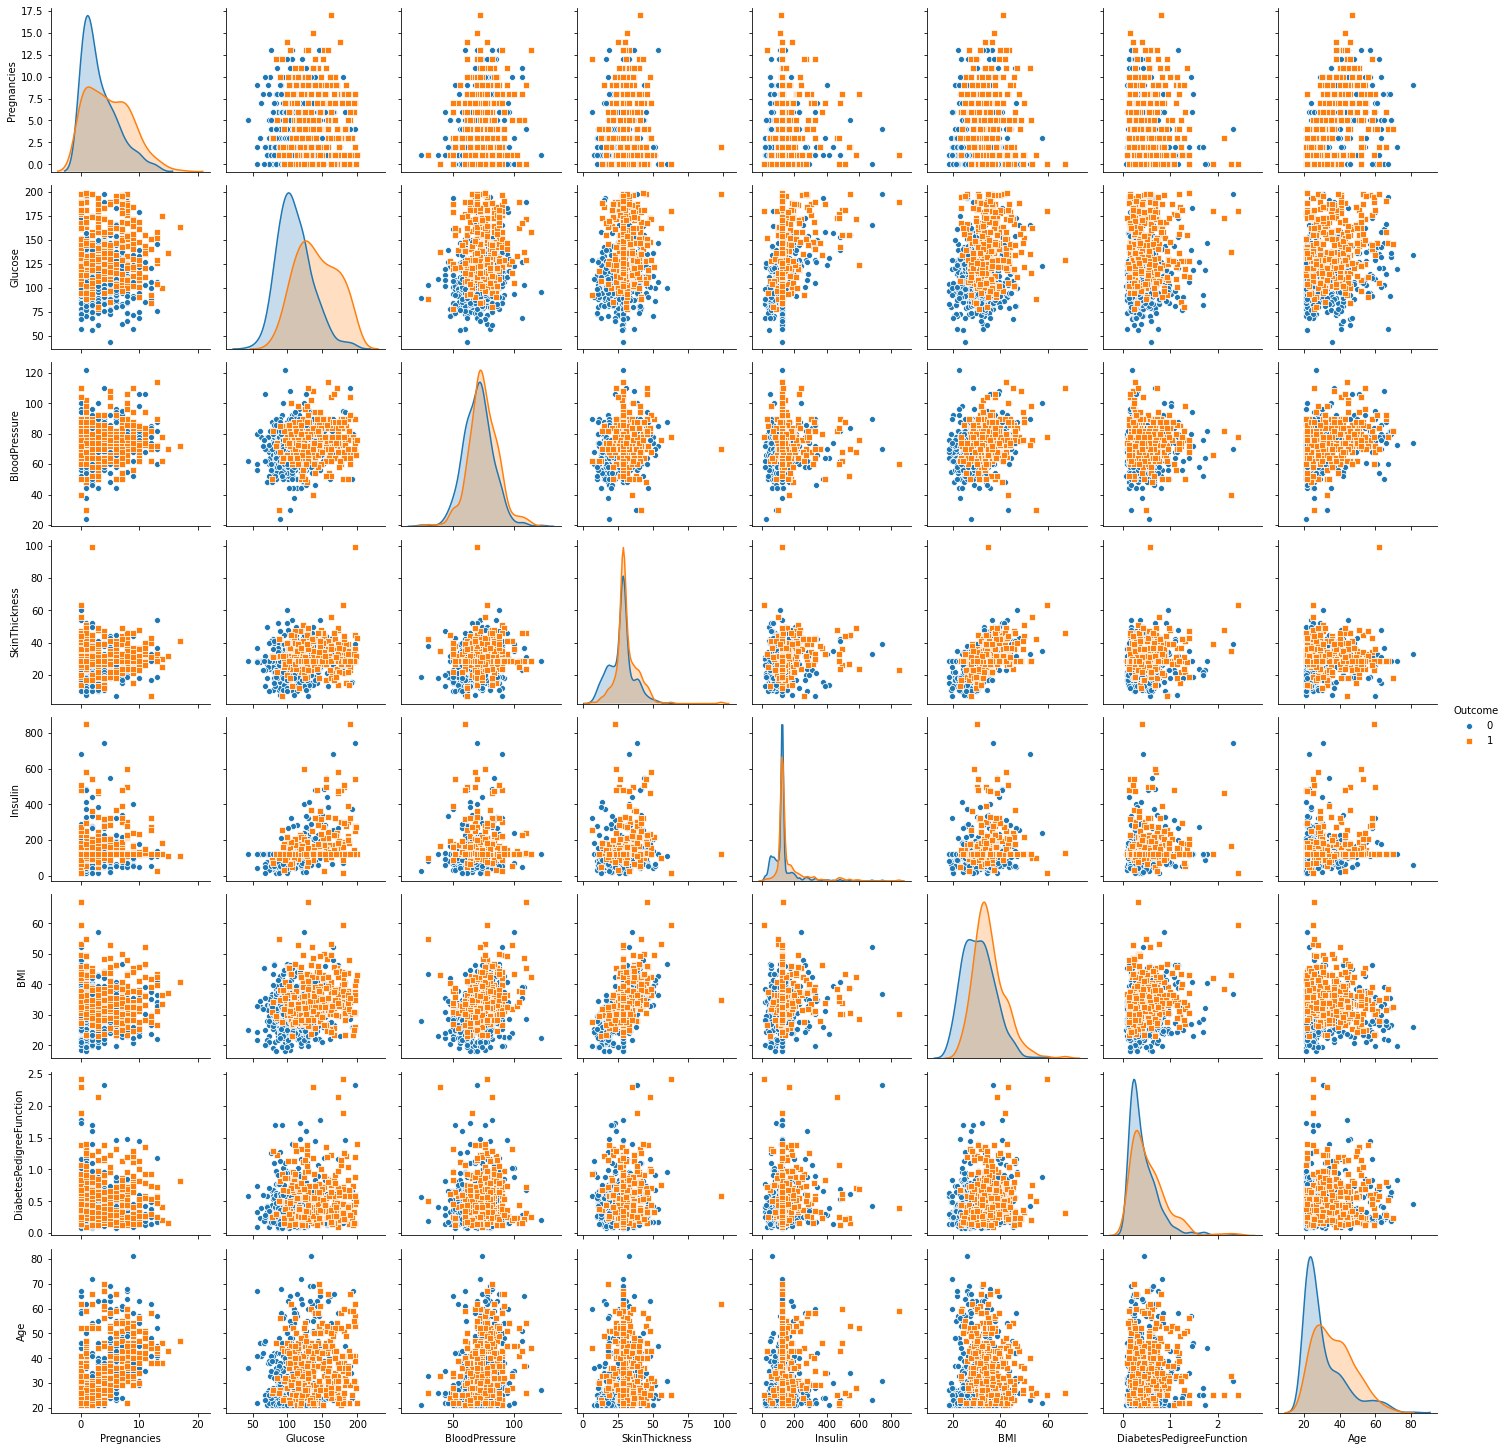

In [28]:
sns.pairplot(df_copy , markers=["o", "s"] ,hue = 'Outcome')

## Heatmap between the original and the modified data

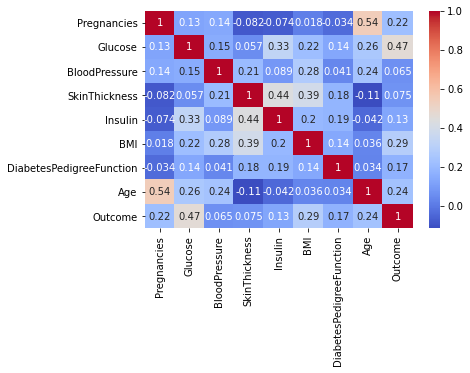

In [29]:
p=sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

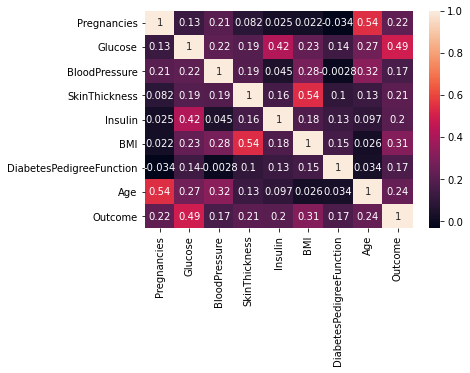

In [30]:
p=sns.heatmap(df_copy.corr(),annot=True)

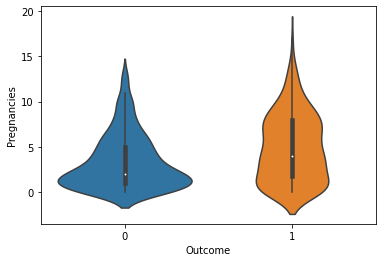

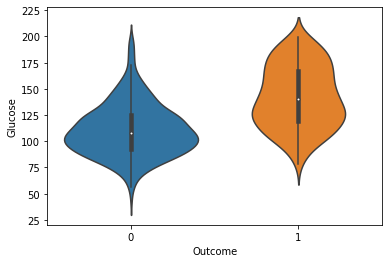

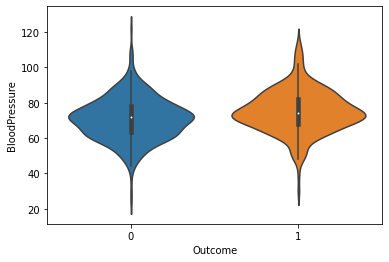

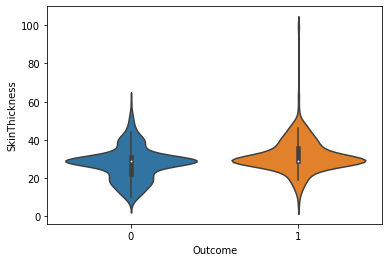

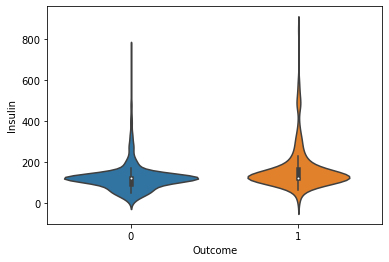

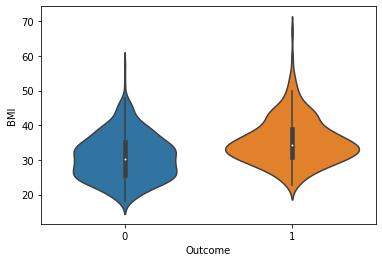

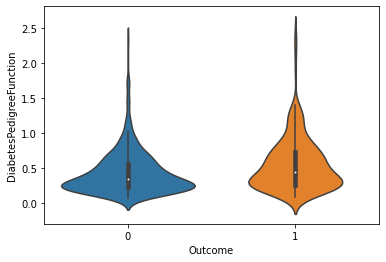

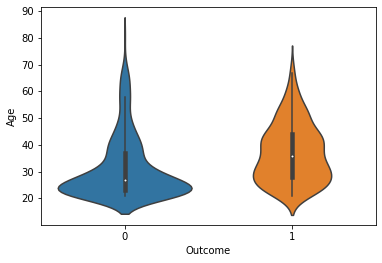

In [31]:
for column in df_copy:
  if column !='Outcome':
    sns.violinplot(x=df_copy.Outcome, y=df_copy[column])
    plt.show()
  else:  
    break

### **Scaling the data**


In [32]:
sc_X = StandardScaler()# Standardize features by removing the mean and scaling to unit variance
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [34]:
y = df_copy.Outcome # same as df_copy['Outcome']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)
#Initlaze and set the value of X_train,X_test,y_train,y_test
# test_size=0.33 use 33% of the data to be for test 

In [36]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**score that comes from testing on the same data points that were used for training**

In [37]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


**score that comes from testing on the data points that were split in the beginning to be used for testing solely**

In [38]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.77165354330708 % and k = [11]


### Result Visualisation

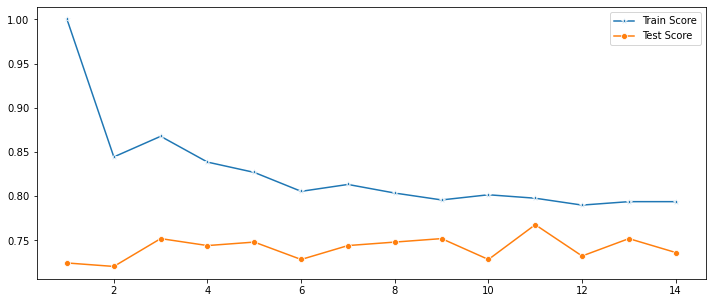

In [39]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

**The best result is captured at k = 11 hence 11 is used for the final model**

In [40]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7244094488188977

**trying to plot decision boundary**

/Users/abdallahshanaa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
/Users/abdallahshanaa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


Text(0.5, 1.0, 'KNN with Diabetes Data')

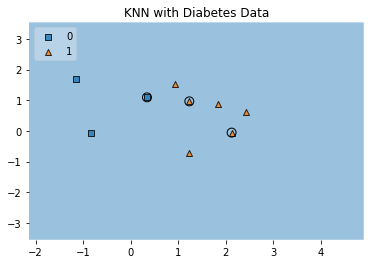

In [41]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')

**let us get the predictions using the classifier we had fit above**

In [42]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,134,31,165
1,39,50,89
All,173,81,254


Text(0.5, 15.0, 'Predicted label')

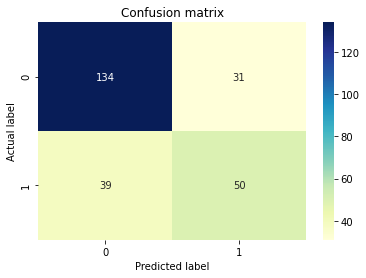

In [43]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       165
           1       0.62      0.56      0.59        89

    accuracy                           0.72       254
   macro avg       0.70      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



# ROC - AUC

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [45]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

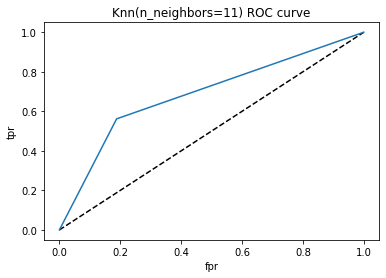

In [46]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

**Area under ROC curve**

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6869594824651005

**In case of classifier like knn the parameter to be tuned is n_neighbors**

In [48]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


In [49]:
df_copy.to_csv('diabetes.csv')

In [50]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
accuracy_scores = np.zeros(3)

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[0]))

# K Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

# Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
prediction = rf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))


Logistic Regression accuracy: 74.01574803149606%
K Nearest Neighbors Classifier accuracy: 74.80314960629921%
Random Forest Classifier accuracy: 73.62204724409449%


In [52]:
# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

K Nearest Neighbors Classifier accuracy: 74.80314960629921%


In [53]:
# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Random Forest Classifier accuracy: 74.01574803149606%


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

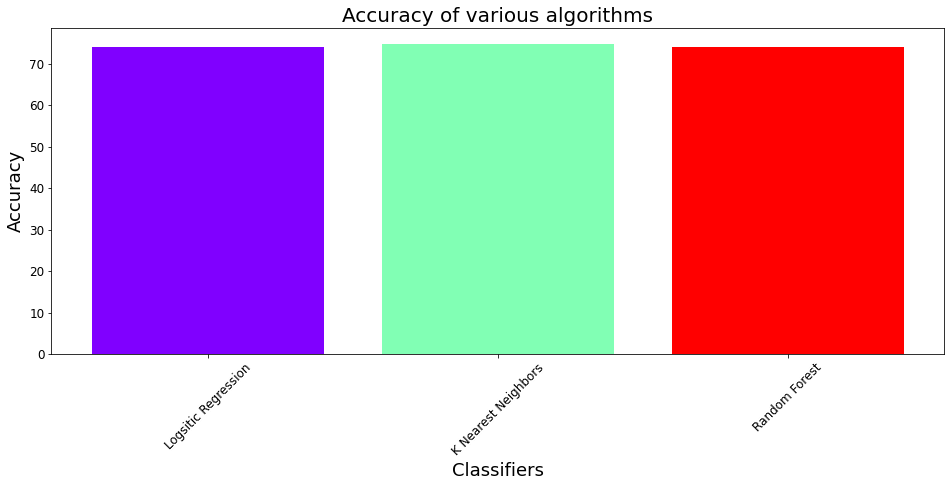

In [54]:
import matplotlib.cm as cm
plt.figure(figsize=(16,6))
colors = cm.rainbow(np.linspace(0, 1, 3))
labels = ['Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

## Conclusion 

In the end, I believe that better results can be achieved by first finding more information that can greatly help in improving the workbook, secondly trying to find the right way to fill in and analyzing the missing information in data, and finally choosing the right classifier by trying more than one classifier as well as changing its properties. 
To help solve this growing crisis in the world and ease its treatment in time.
